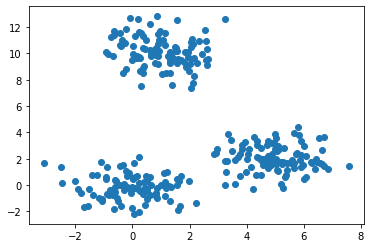

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random

points = [np.random.randn(2) for _ in range(100)]
points.extend([np.random.randn(2) + np.array([5,2]) for _ in range(100)])
points.extend([np.random.randn(2) + np.array([1,10]) for _ in range(100)])

points = np.array(points)

plt.scatter(*zip(*points))
plt.show()

In [68]:
def assign(p, centroids):
    min_c_idx = -1
    min_c_dist = 9**9
    for i, c in enumerate(centroids):
        dist = np.sum((p - c) ** 2)
        if min_c_dist > dist:
            min_c_dist = dist
            min_c_idx = i
    return min_c_idx

def compute_centroids(k, assignments, points):
    clusters = [ [] for _ in range(k) ]

    for a, p in zip(assignments, points):
        clusters[a].append(p)

    return [np.mean(c, axis=0) for c in clusters]

def kmeans(k, points):
    prev_assignments = []

    # 1. 랜덤하게 centroid를 설정
    centroids = random.choices(points, k=k)

    for epoch in range(10):
        print(epoch)
        
        # 2. 각각의 점을 가장 가까운 중심정의 클러스터에 포함시킴
        assignments = [assign(p, centroids) for p in points]
        
        # 3. 각 클러스터 별로 centroid를 다시 계산
        centroids = compute_centroids(k, assignments, points)
        
        # 4. 변화가 없으면 중지, 있으면 계속
        if prev_assignments == assignments: break
        prev_assignments = assignments
        
    return assignments, centroids

0
1
2
3
4


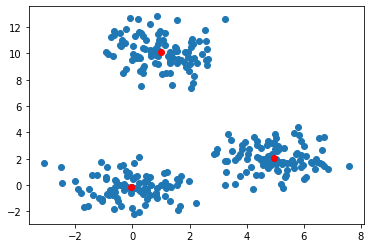

In [69]:
assignment, centroids = kmeans(3, points)

plt.scatter(*zip(*points))
plt.scatter(*zip(*(centroids)), c="red")

plt.show( )

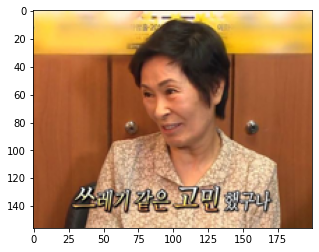

0
1
2
3
4
5
6
7
8
9


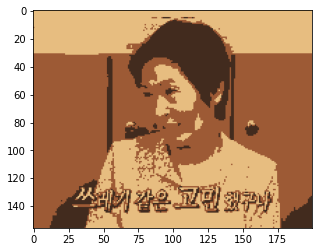

In [70]:
from PIL import Image

img = Image.open("unnamed.jpg")

width = 200
height = width * img.height // img.width

img = img.resize((width, height))

plt.imshow(img)
plt.show()

pixels = np.array(img).reshape(-1, 3)
assignment, centroids = kmeans(3, pixels)

for i, a in zip(range(pixels.shape[0]), assignment):
    pixels[i] = centroids[a]

image_remastered = Image.fromarray(pixels.reshape(156,200,3), "RGB")

plt.imshow(image_remastered)
plt.show()